In [28]:
#IMPORTS
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [29]:
#Data merging/processing
#No need to run this if you already have the merged_df.csv file

demographics = pd.read_csv('demographics.csv')
referral = pd.read_csv('referral.csv')
transactions = pd.read_csv('transactions.csv')

#clean up data for merge
demographics['cust_id'] = demographics['cust_id'].str.replace('_cust', '')
transactions['cust_id'] = transactions['cust_id'].astype('object')



merged_df = pd.concat([demographics, referral, transactions], axis=1)


#drop duplicates/unneccesary columns
merged_df = merged_df.drop('id', axis=1)
merged_df = merged_df.loc[:, ~merged_df.columns.duplicated()]

#make all elements in subscription_type uppercase
merged_df['subscription_type'] = merged_df['subscription_type'].str.upper()

#convert "f" to "Female" and "m" to "Male" in the customer_gender column
merged_df['customer_gender'] = merged_df['customer_gender'].replace({'f': 'Female', 'm': 'Male'})

merged_df['customer_country'] = merged_df['customer_country'].replace({'Sverige': 'Sweden', 'Norge': 'Norway'})

merged_df.head(10)

#convert merged_df to csv
merged_df.to_csv('merged_df.csv')






<AxesSubplot:xlabel='customer_gender', ylabel='counts'>

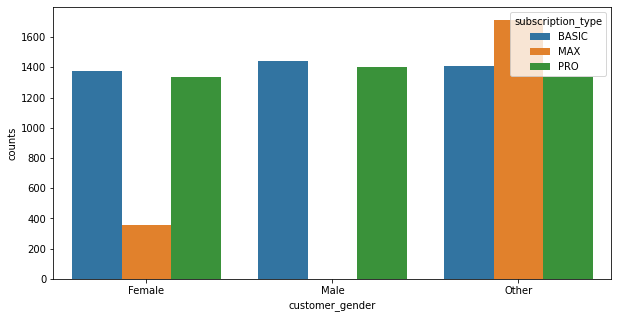

In [30]:
#DEMOGRAPHICS ANALYSIS

merged_df = pd.read_csv('merged_df.csv')
# group the data by gender and subscription type
grouped_data = merged_df.groupby(['customer_gender', 'subscription_type']).size().reset_index(name='counts')

# barplot for each gender and subscription type

fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x='customer_gender', y='counts', hue='subscription_type', data=grouped_data, ax=ax)






<AxesSubplot:xlabel='age_group', ylabel='counts'>

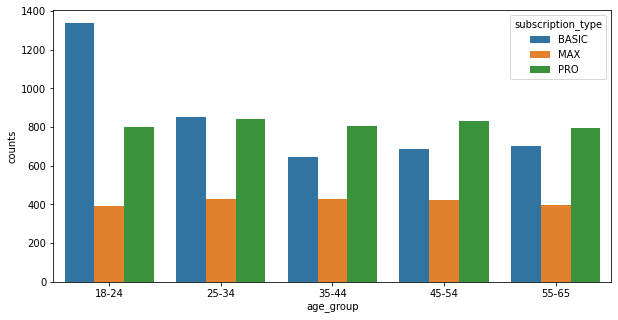

In [31]:
# group the for each age group and subscription type

grouped_data = merged_df.groupby(['age_group', 'subscription_type']).size().reset_index(name='counts')

# barplot for each age group and subscription type

fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x='age_group', y='counts', hue='subscription_type', data=grouped_data, ax=ax)

<AxesSubplot:xlabel='customer_country', ylabel='counts'>

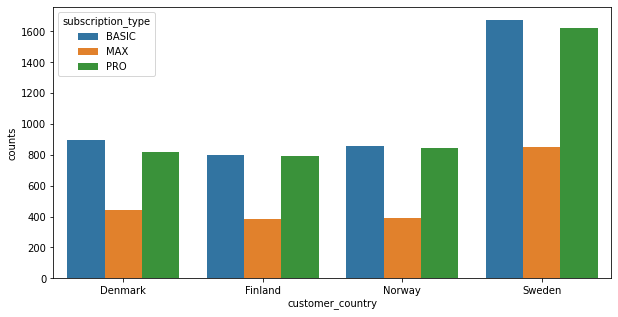

In [32]:
# group the for each country and subscription type

grouped_data = merged_df.groupby(['customer_country', 'subscription_type']).size().reset_index(name='counts')

# barplot for each country and subscription type

fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x='customer_country', y='counts', hue='subscription_type', data=grouped_data, ax=ax)

<AxesSubplot:xlabel='customer_gender', ylabel='counts'>

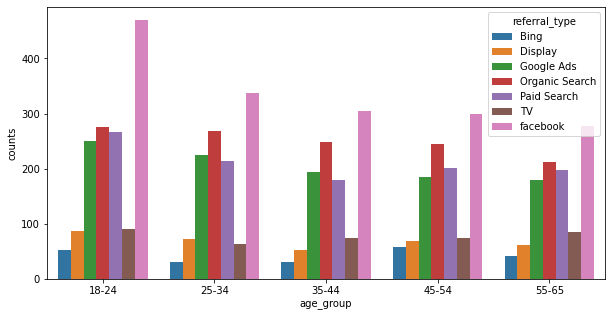

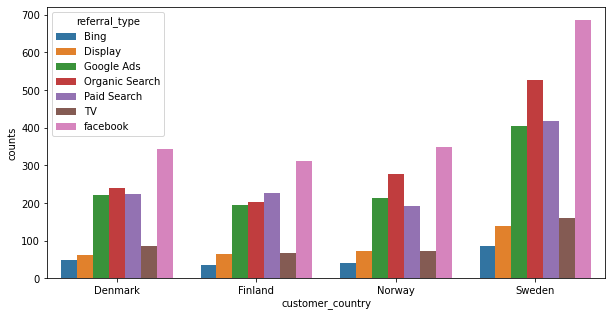

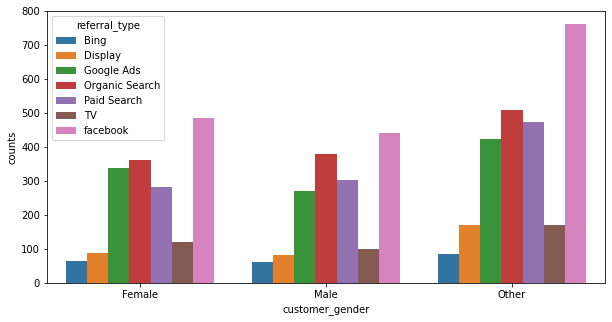

In [33]:
# group for each referral type and subscription type

grouped_data = merged_df.groupby(['age_group', 'referral_type']).size().reset_index(name='counts')

# barplot for each referral type and subscription type

fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x='age_group', y='counts', hue='referral_type', data=grouped_data, ax=ax)

# group for each referral type and country

grouped_data = merged_df.groupby(['customer_country', 'referral_type']).size().reset_index(name='counts')

# barplot for each referral type and country

fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x='customer_country', y='counts', hue='referral_type', data=grouped_data, ax=ax)

# group for each referral type and gender

grouped_data = merged_df.groupby(['customer_gender', 'referral_type']).size().reset_index(name='counts')


# barplot for each referral type and gender

fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x='customer_gender', y='counts', hue='referral_type', data=grouped_data, ax=ax)



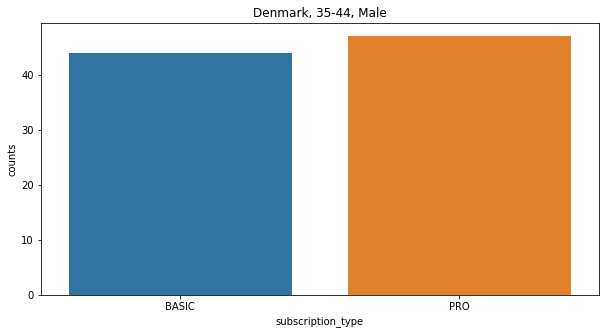

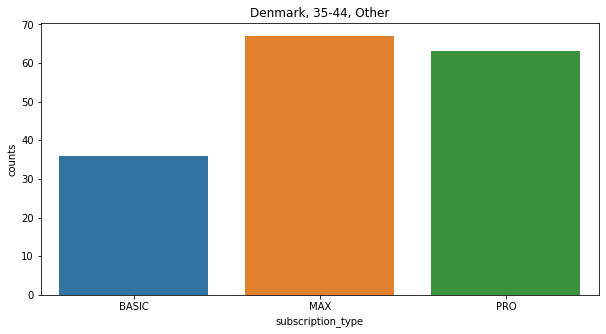

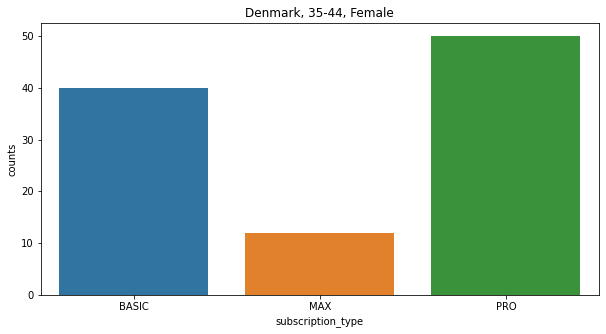

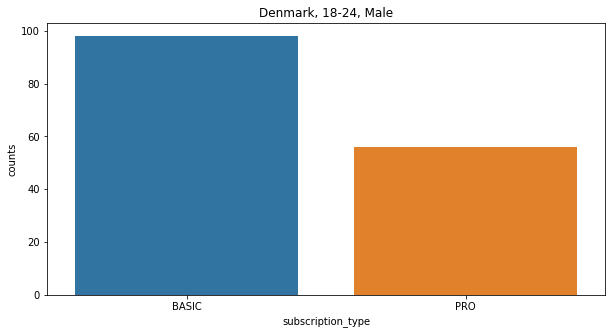

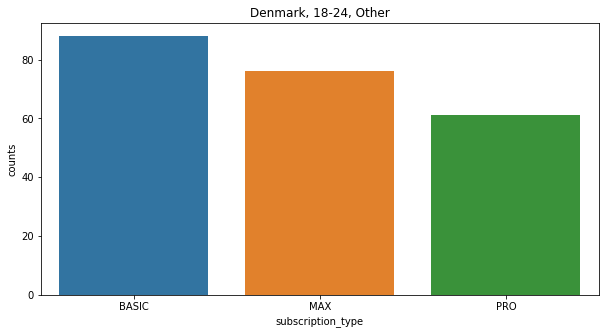

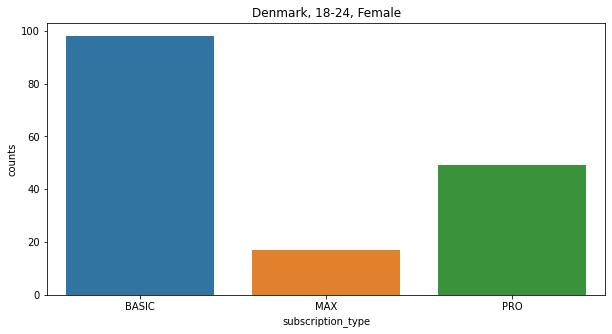

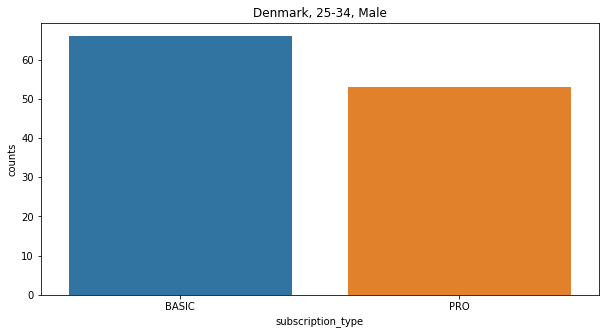

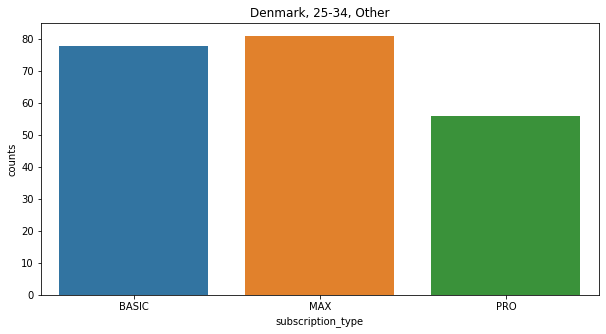

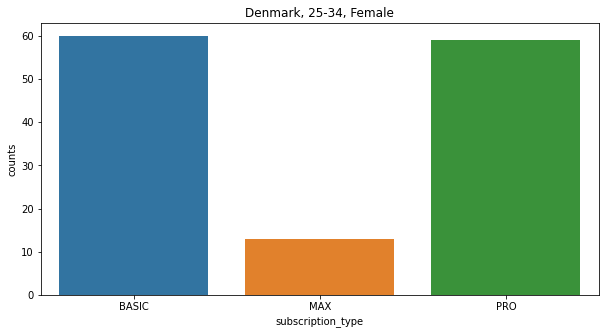

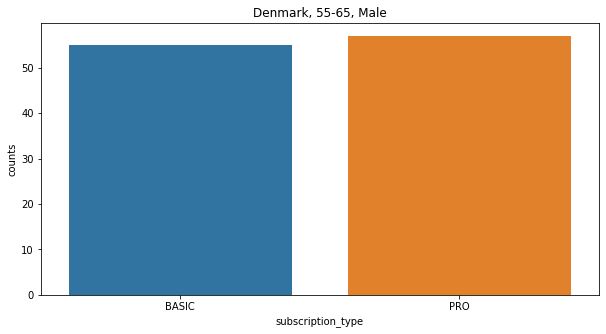

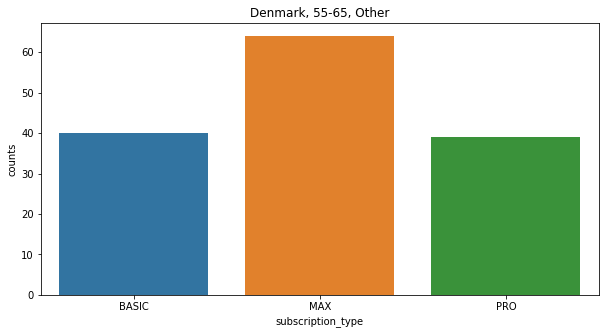

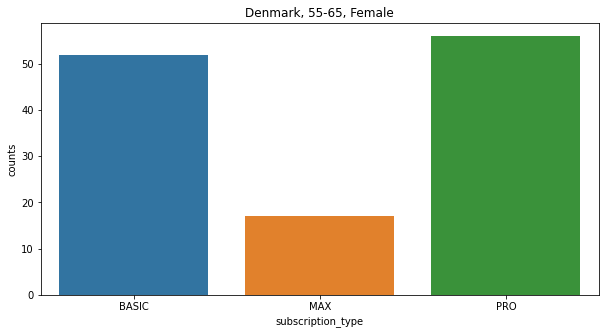

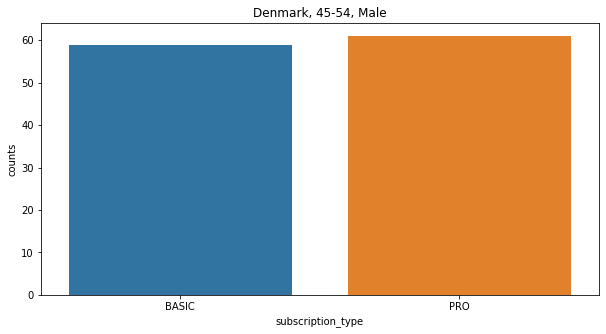

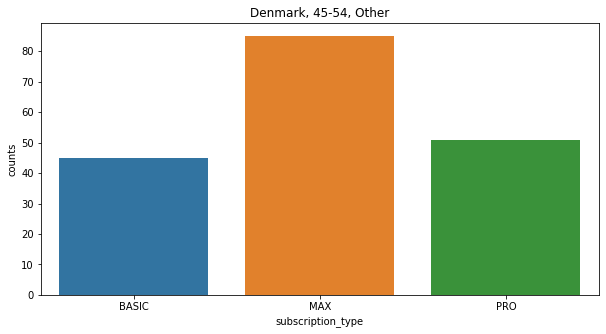

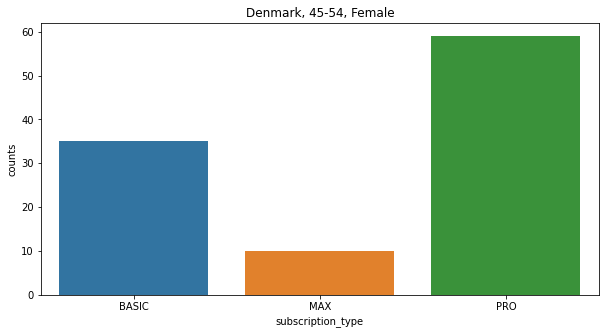

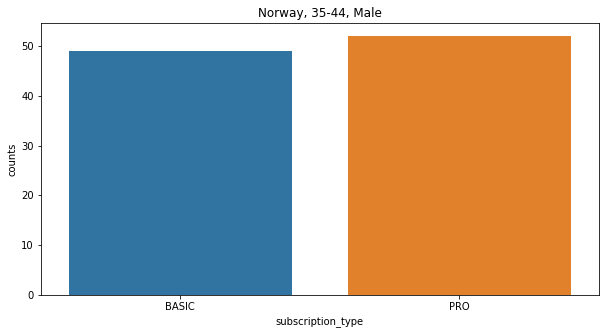

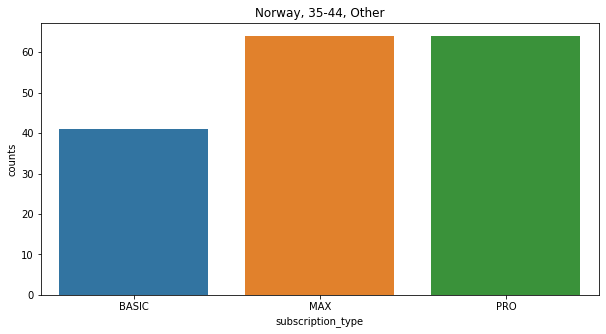

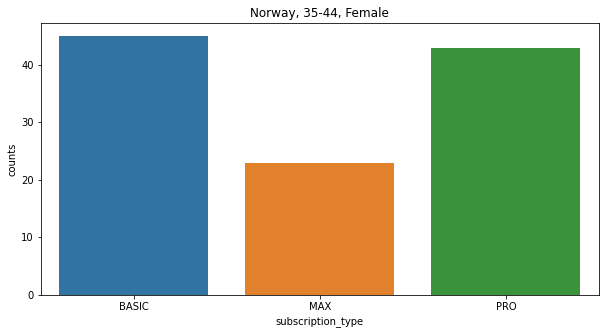

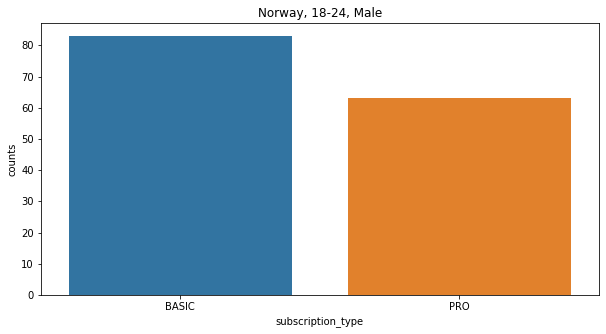

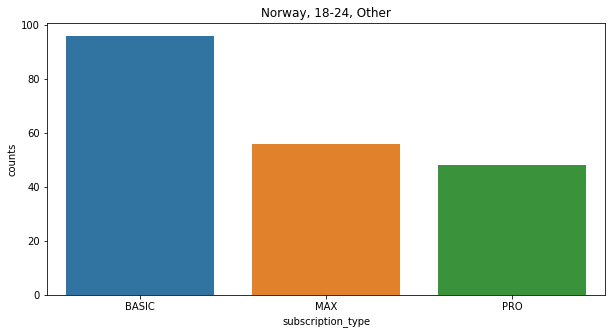

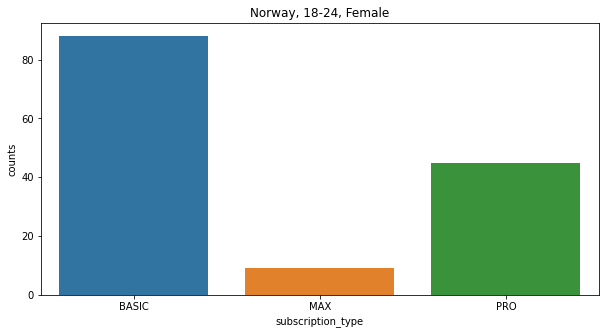

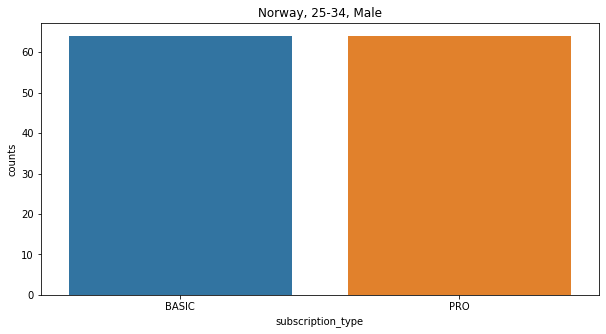

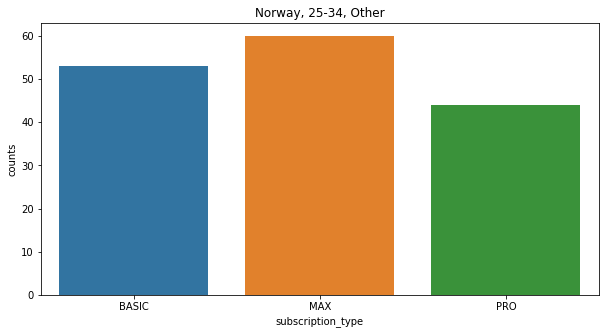

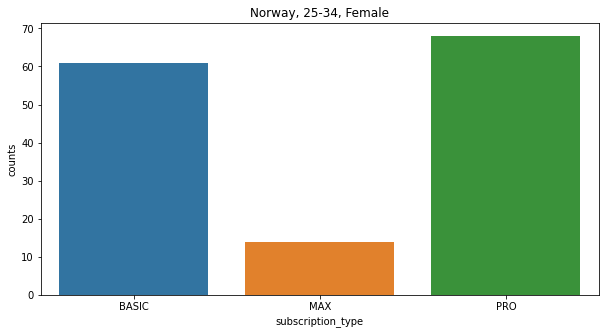

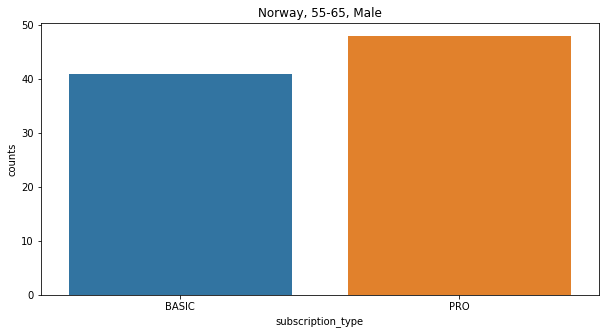

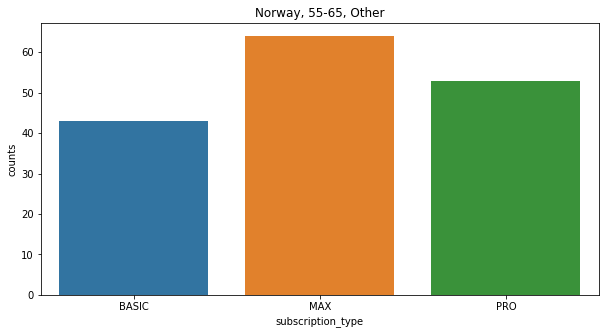

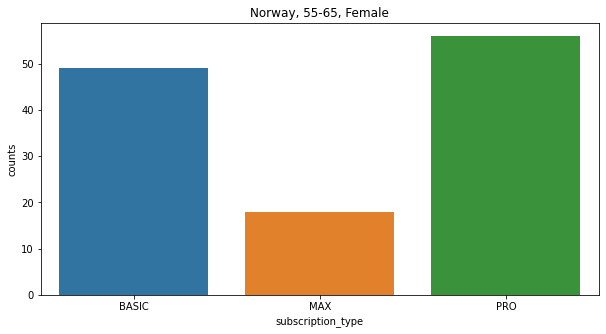

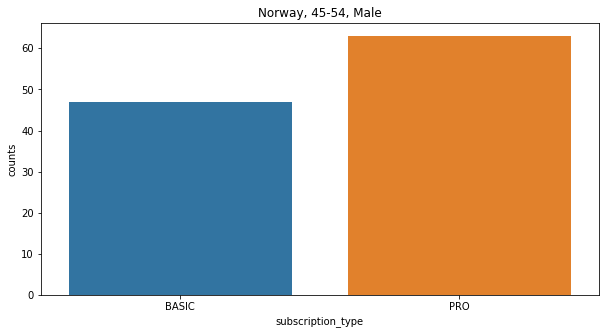

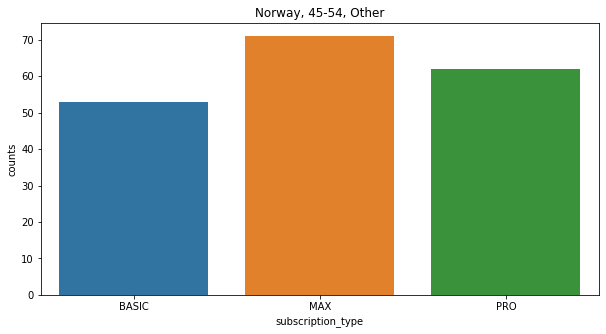

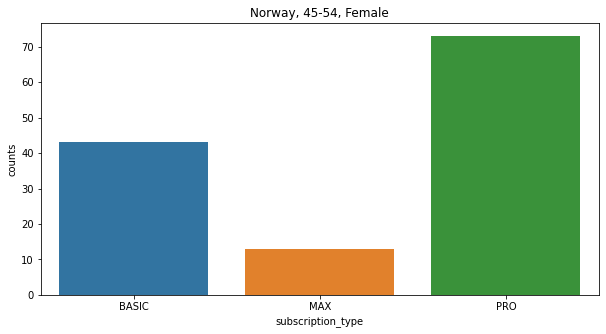

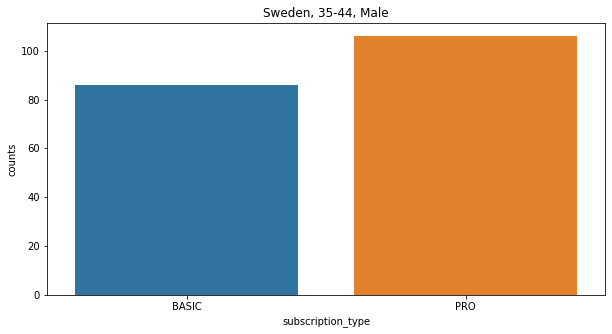

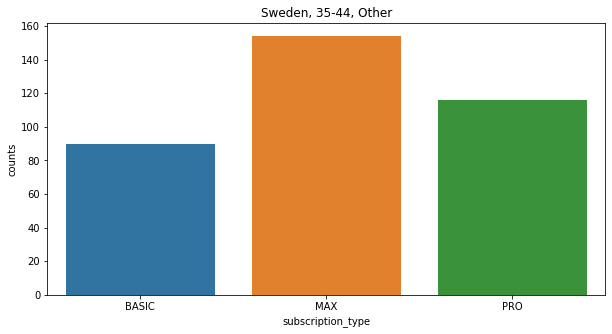

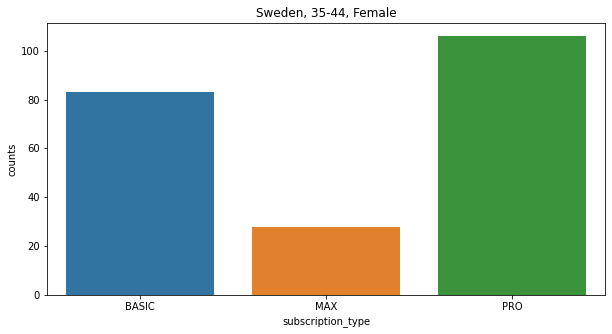

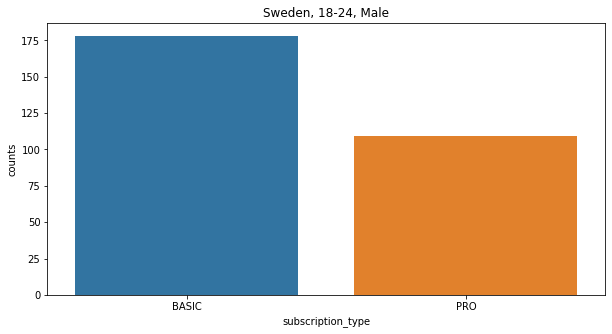

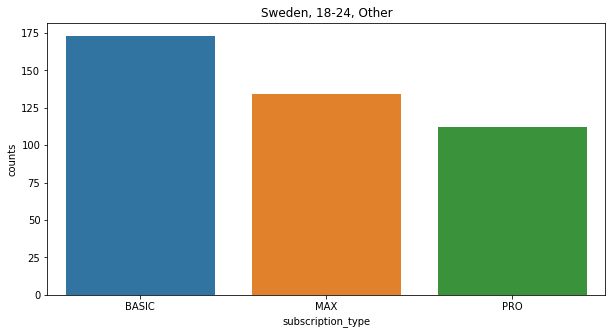

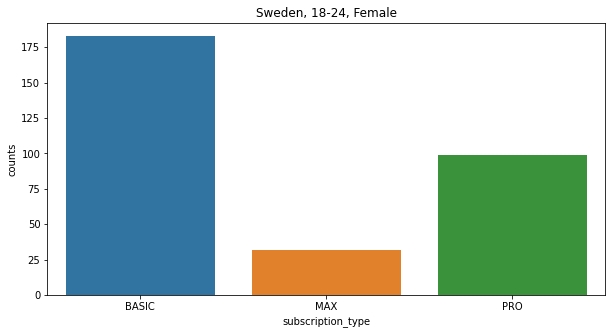

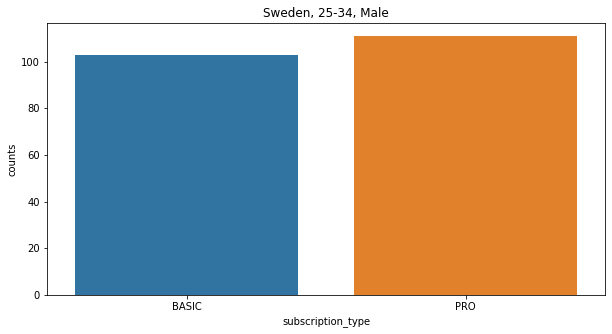

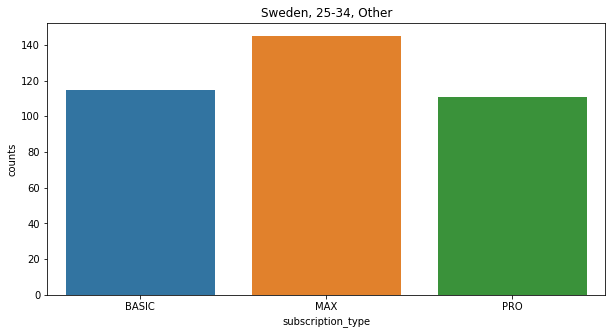

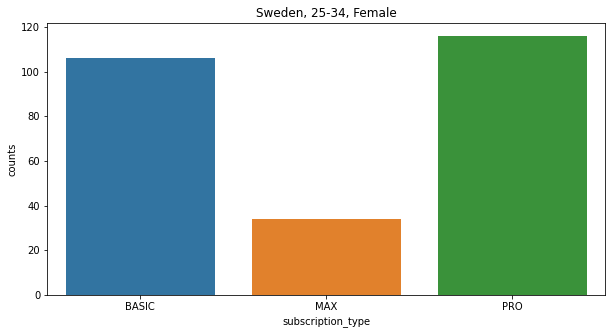

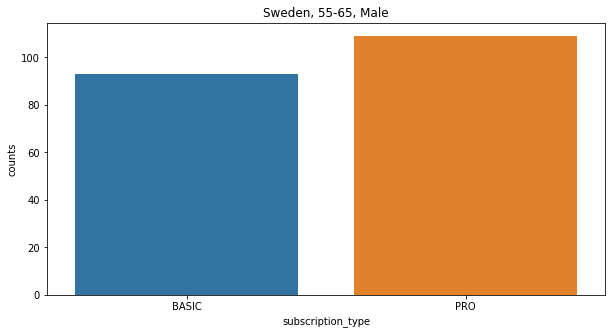

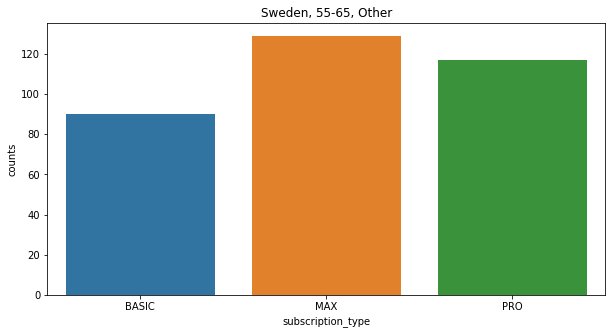

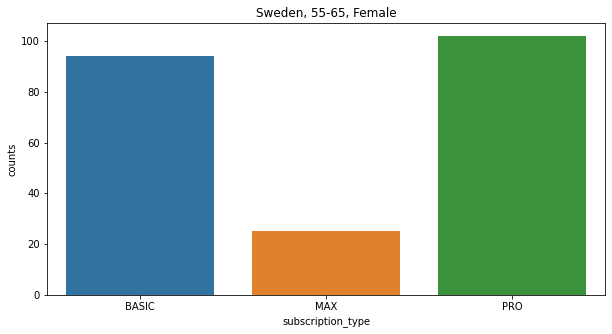

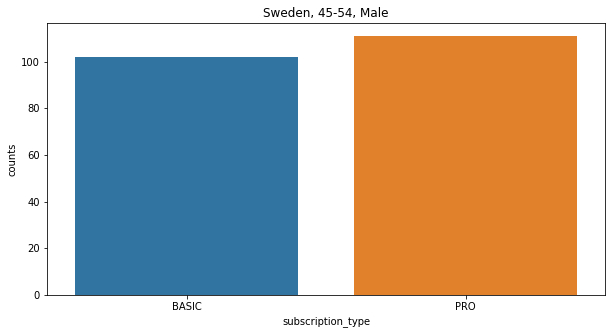

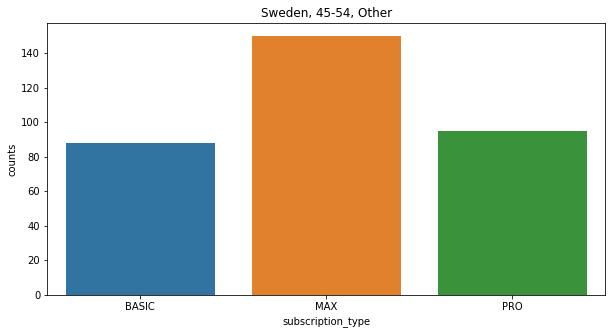

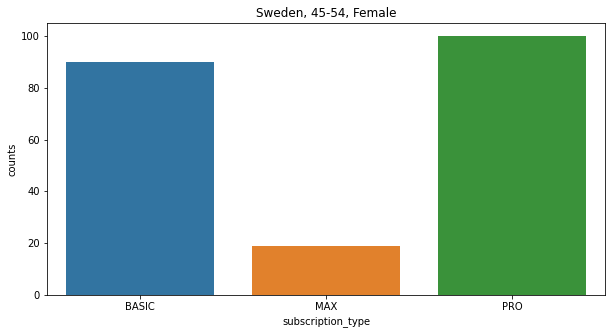

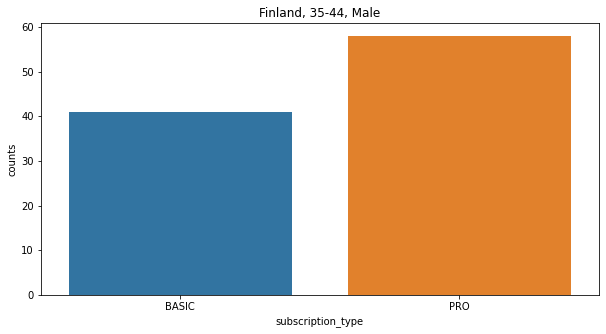

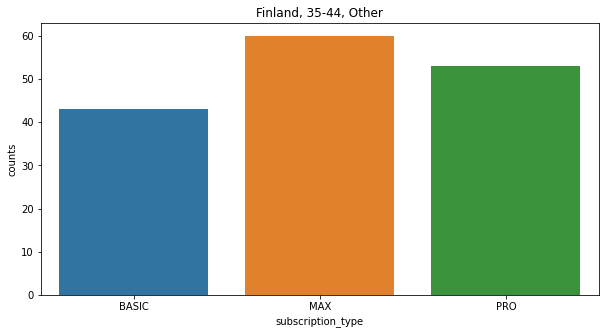

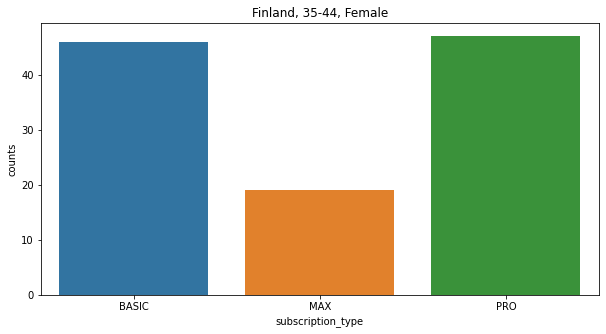

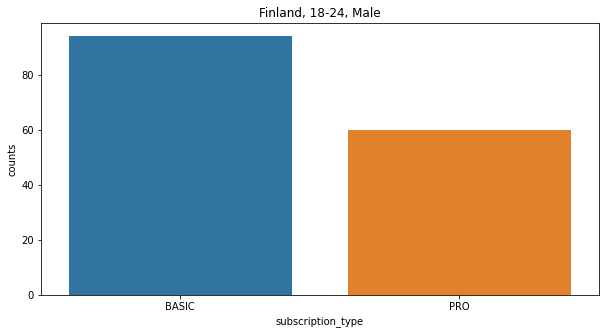

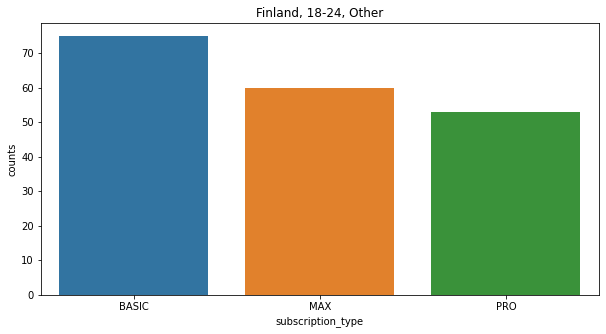

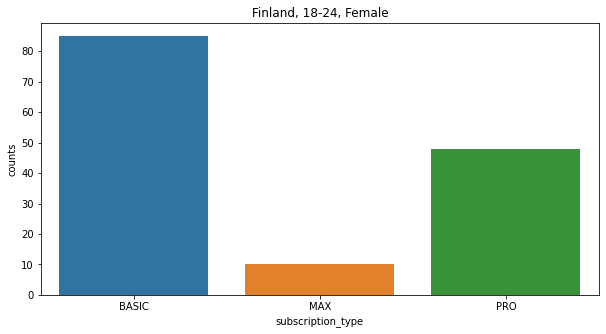

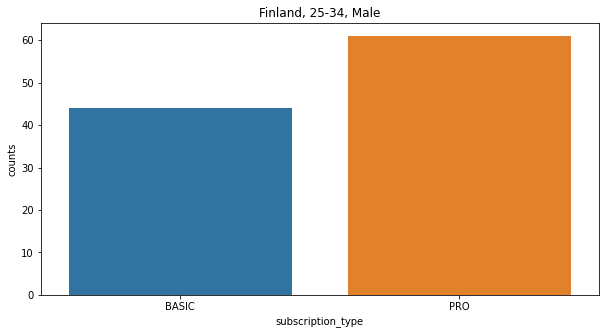

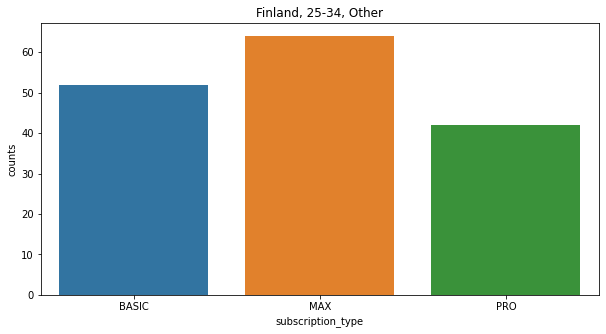

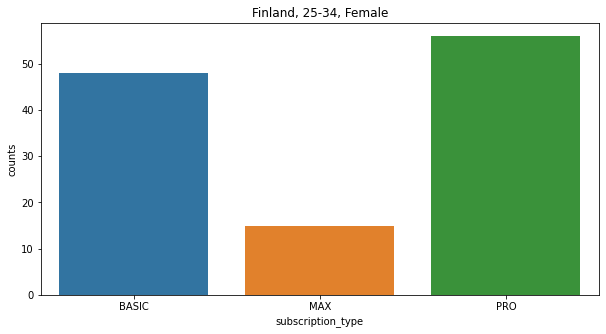

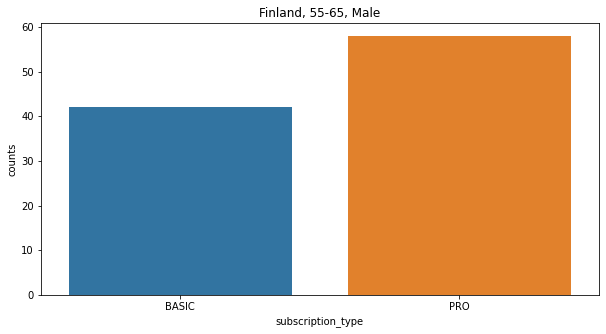

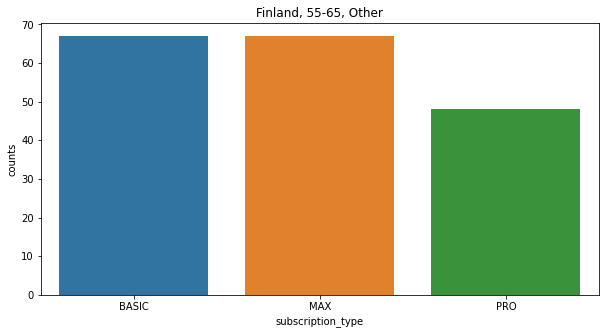

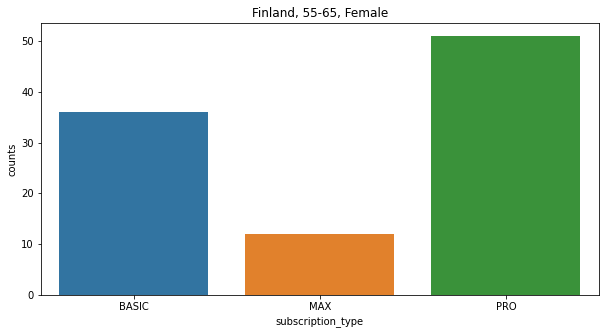

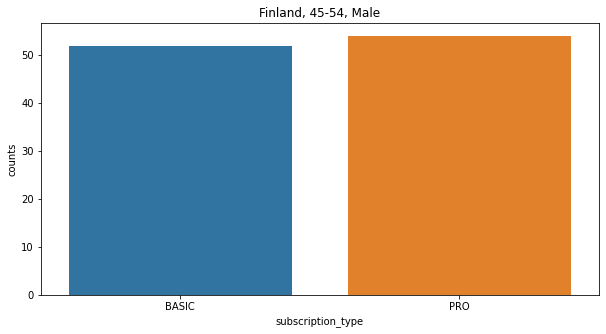

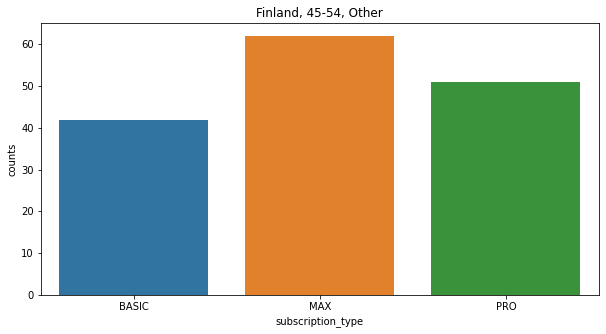

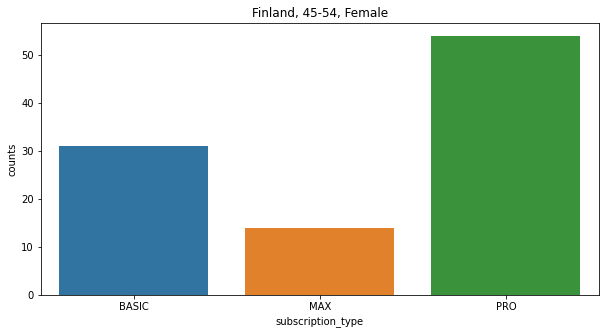

In [34]:

#Code for looking at subscription for each combination of age, country and gender. Did this so I could see if there were any outliers in the data,
#but it seemed to be pretty consistent across all combinations knowing the trends from our data before.

#Collaps the outputs if you are not interested in this
for country in merged_df['customer_country'].unique():
    for age_group in merged_df['age_group'].unique():
        for gender in merged_df['customer_gender'].unique():
            # filter the data based on the current combination of variables
            filtered_data = merged_df[(merged_df['customer_country'] == country)
                                      & (merged_df['age_group'] == age_group)
                                      & (merged_df['customer_gender'] == gender)]
            
            # group the filtered data by subscription type and count the number of occurrences
            grouped_data = filtered_data.groupby(['subscription_type']).size().reset_index(name='counts')
            
            filtered_data = merged_df[(merged_df['customer_country'] == country)
                                      & (merged_df['age_group'] == age_group)
                                      & (merged_df['customer_gender'] == gender)]
            
            # Group the filtered data by subscription type and count the number of occurrences
            grouped_data = filtered_data.groupby(['subscription_type']).size().reset_index(name='counts')
            
            # Plot a histogram for the current combination of variables, if there is data to plot
            if not grouped_data.empty:
                fig, ax = plt.subplots(figsize=(10, 5))
                sns.barplot(x='subscription_type', y='counts', data=grouped_data, ax=ax)
                ax.set_title(f"{country}, {age_group}, {gender}")
                plt.show()


# Findings

The analysis revealed several interesting insights that could help the client improve customer retention and overall revenue. What I found was that:

* Facebook is the biggest referral type
* The age group 18-24 has the most subscriptions, and brings in the most revenue, with a large number of BASIC subscriptions
* Sweden has a much higher number of subscriptions compared to the other countries, and brings in the most revenue
* The gender "Other" has the most subscriptions, and brings in the most revenue
# Recommendations
Based on my findings, I recommend that the client focuses on improving retention and engagement for customers in the 18-24 age group, particularly those with BASIC subscriptions. I also suggest that the client considers targeted marketing efforts in Sweden and explores opportunities to attract more customers in other countries. Additionally, the client should consider investigating the reasons why the "Other" gender has the highest number of subscriptions and whether there are any particular features or benefits of the subscription service that are particularly appealing to this group.

# Improvements

Given more time, I would have looked at subscription_prices to get actual values for the different demographic groups and plotted it, but since this assignment was supposed to take around 1 hour I didn't start with that.
